# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab02_404_Sheipak_Sviat.ipynb`
    - `2022_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/vHEio0TmfAMmZg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [2]:
input_filename = 'data/feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

In [3]:
print(db.head())

         0          1         2         3          4         5         6   \
0  1.550508  19.483747 -0.002987  4.421460   5.541652  0.468138 -0.017365   
1  9.683788  14.336396 -0.027154  5.100489   8.179487  0.573692 -0.024525   
2  4.682631   8.112067 -0.012813  4.680838   1.514920  0.974407 -0.009002   
3  7.768197   2.074808 -0.014950  7.977821  13.602144  0.599069 -0.018800   
4  4.078857   8.307135 -0.004062  9.351602   6.661857  0.193607 -0.019705   

         7         8         9   10  
0  0.005496  0.931543 -0.033190  15  
1  0.002686  0.880111 -0.040193  17  
2  0.007909  0.050082 -0.053341  12  
3  0.012021  0.632768 -0.035886  16  
4  0.007799  0.868582 -0.028378  20  


Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [4]:
X = ((np.array(db).T)[0:10]).T
Y = ((np.array(db).T)[10]).T
print(db.shape, X.shape, Y.shape, sep='\n')

(1000, 11)
(1000, 10)
(1000,)


Now split the data into train and test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
RANDOM_SEED = 42

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
model_lr.fit(X_train, Y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)
train_score = mean_squared_error(train_pred, Y_train)
test_score = mean_squared_error(test_pred, Y_test)

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score 

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

In [12]:
model_lr.coef_

array([ 0.73940111,  0.32974783,  4.73127207,  0.96177656,  0.3447126 ,
        0.19634365,  6.79298281,  5.65714792, -0.14087087,  6.02339597])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


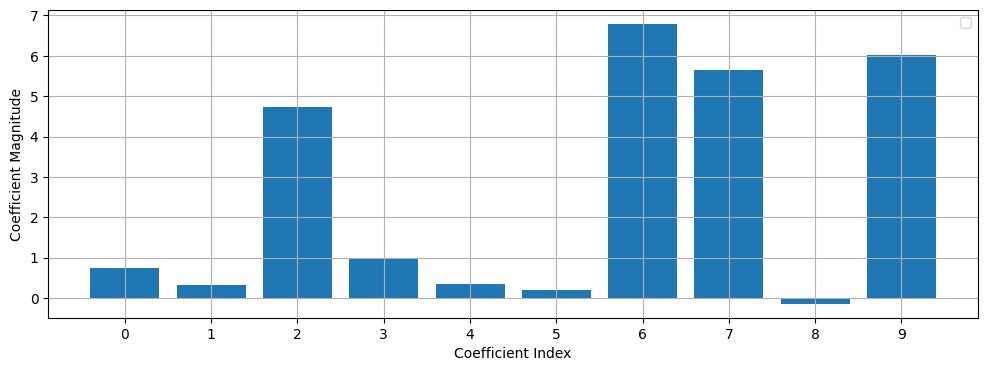

In [13]:
model_coefs = model_lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs)
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here**: there are features with indexes **2, 6, 7, 9**

Save 4 most important feature indexes to a list:

In [14]:
important_feature_idx = [2, 6, 7, 9]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [15]:
X_train_smaller = ((X_train.T)[important_feature_idx]).T
X_test_smaller = ((X_test.T)[important_feature_idx]).T

Define a new `LinearRegression` model, train and test it on new sets: 

In [16]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred = smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(train_pred, Y_train)
test_score = mean_squared_error(test_pred, Y_test)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

**Your answer here**: If we look at the data in X, then in the columns with indexes 2, 6, 7, 9 there are data, absolutly less than 1, and in the other columns are greater. That show why weights for feature's 2, 6, 7, 9 are so large. So, our model is not objective now

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [19]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [20]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train)
train_pred = model_lr_sc.predict(X_sc_train)
test_pred = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score = mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


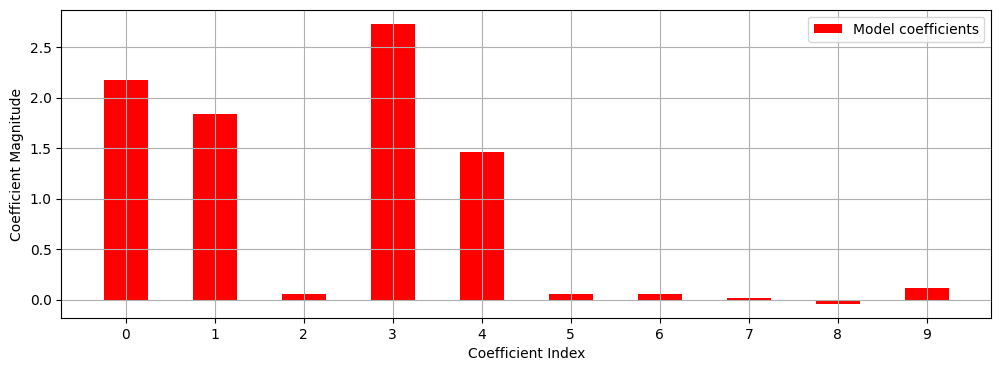

In [21]:
model_coefs = model_lr_sc.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label="Model coefficients", width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? *(0, 1, 3, 4)* Let's do the sanity check and train on this subset:

In [22]:
important_feature_idx = [0, 1, 3, 4] 

In [23]:
X_sc_train_smaller = ((X_sc_train.T)[important_feature_idx]).T
X_sc_test_smaller = ((X_sc_test.T)[important_feature_idx]).T

In [24]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(train_pred, Y_sc_train)
test_score = mean_squared_error(test_pred, Y_sc_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: 
 - We have a little worse result on train data predict: 5.814 vs 5.841
 - But test data predict looks better: 6.916 vs 6.856  

As expected, with a smaller number of features, the model trained slightly worse for the training data, but by removing insignificant features, it began to predict a little better.

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [27]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_score = mean_squared_error(rf.predict(X_test), Y_test)
rf_scaled_test_score = mean_squared_error(rf_scaled.predict(X_sc_test), Y_sc_test)
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 2.834
RF scaled test score 3.002


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

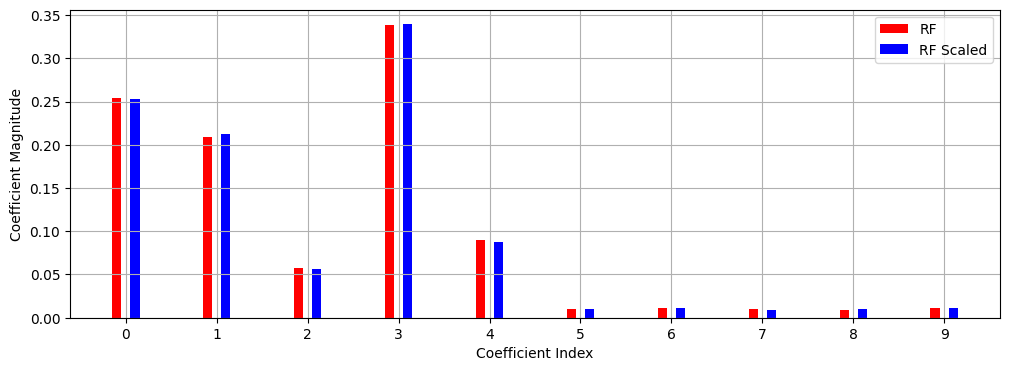

In [28]:
rf_model_coefs = rf.feature_importances_
rf_scaled_model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot:** We can see that the coefficient magnitude does not depend about model normalization.

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [29]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.062 seconds


c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\linalg\linalg.py:2146: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [30]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [31]:
start_1 = time()
rf1.fit(X_sc_train, Y_sc_train)
end_1 = time()

start_2 = time()
rf2.fit(X_sc_train_smaller, Y_sc_train)
end_2 = time()

print("All features model fitting time is ", round(end_1 - start_1, 5), "\n Four main features model fitting time is ", round(end_2 - start_2, 5), sep='')

All features model fitting time is 0.39303
 Four main features model fitting time is 0.23702


**Your Comment on time consuption**: For smaller model we take only 4 features from 10. So we work with dataset which about **1.66** times less then basic one. As result, fitting time in smaller model decrease in the same **1.66** times.

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [33]:
RANDOM_SEED = 42

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [35]:
data = pd.read_csv("data/richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [36]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1030261,27,269,8954,4,45,8,10,t,r,...,0,0,0,0,0,0,0,0,0,2
1,419144,11,765,2964,2,65,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
2,543923,22,378,9559,2,30,10,4,t,r,...,0,0,0,0,0,0,0,0,0,2
3,495911,10,310,6799,2,10,5,4,t,w,...,0,0,0,0,0,0,0,0,0,1
4,347963,18,321,2911,1,20,15,2,t,r,...,0,0,0,0,0,0,0,0,0,3


In [37]:
X = ((np.array(data._get_numeric_data()).T)[:-1]).T
y = np.array(data._get_numeric_data()["damage_grade"])

assert X.shape == (35000, 31) and  y.shape == (35000,)

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify= y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3, 
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [270]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [271]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)  #YOUR CODE HERE
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [272]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

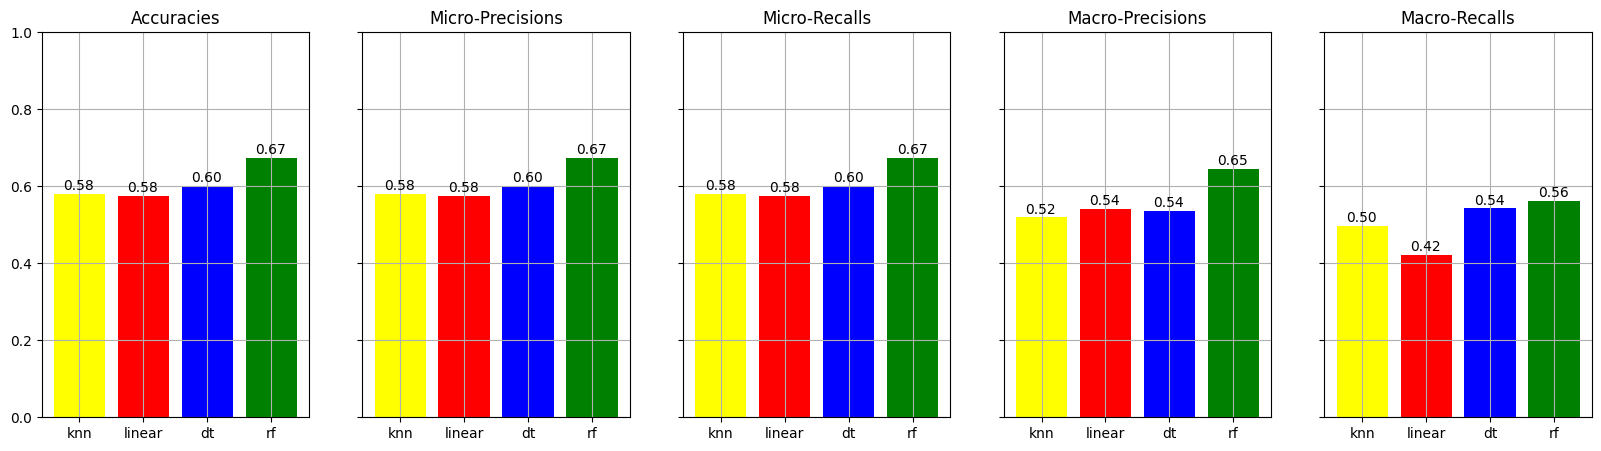

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [47]:
weakest_model_index = 2

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

In [48]:
print(conf_matrix)

[[ 389  506   69]
 [ 557 3709 1415]
 [  75 1366 1914]]


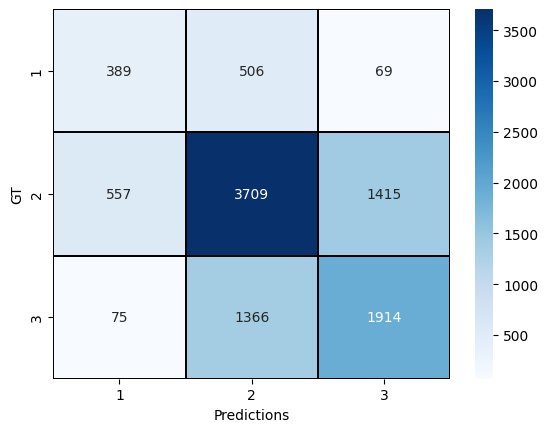

In [49]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=[1, 2, 3],
            yticklabels=[1, 2, 3],
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:** It seems that the first class is the most difficult to predict, since there are almost twice as many incorrect classifications in the first class as correct ones. This cannot be seen for other classes. A lot of false positive results with not so much true positive results make macro/micro-precision small.

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

**Firstly** let's chouse top-10 features from 31 in basic model 

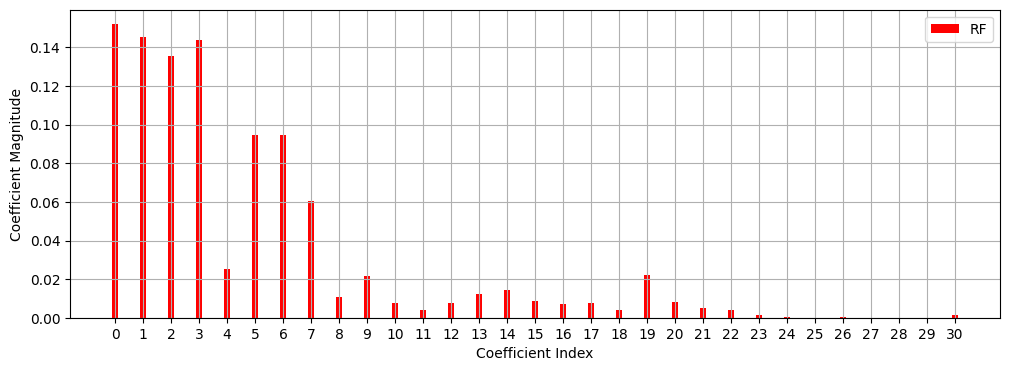

In [50]:
from cProfile import label


features_im = default_classifiers[3].feature_importances_
default_x = np.arange(len(features_im))

plt.figure(figsize=(12,4))
plt.bar(default_x, features_im, label="RF", width=0.2, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

There are main features indexes *0, 1, 2, 3, 4, 5, 6, 7, 9, 19*

In [51]:
from matplotlib.pyplot import axes

main_coefs_idx = [0, 1, 2, 3, 4, 5, 6, 7, 9, 19]
X_train_smaller = ((X_train.T)[main_coefs_idx]).T
X_test_smaller = ((X_test.T)[main_coefs_idx]).T
X_val_smaller = ((X_val.T)[main_coefs_idx]).T


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

- **KNN n_neighbors 1D Grid Search**

In [53]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 51)
}

In [54]:
knn_grid_searcher = GridSearchCV(knn_clf, param_grid=knn_grid, n_jobs=-1, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

8:38 minutes

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [131]:
means = knn_grid_searcher.cv_results_["mean_test_score"]
stds = knn_grid_searcher.cv_results_["std_test_score"]

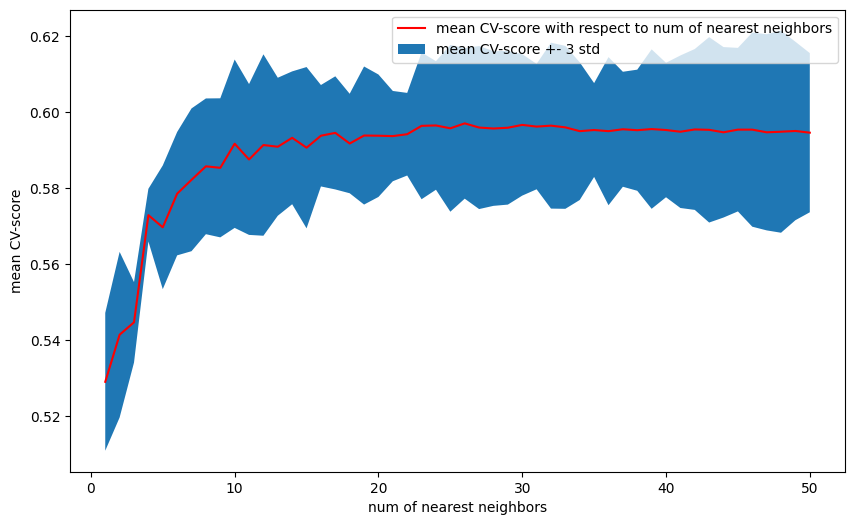

In [132]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, knn_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to num of nearest neighbors")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("num of nearest neighbors")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

Print the best estimator and its score:

In [133]:
print("The best estimator is", knn_grid_searcher.best_estimator_, "with score", knn_grid_searcher.best_score_)

The best estimator is KNeighborsClassifier(n_neighbors=26) with score 0.5971


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

 - **Decision Tree max_depth 1D Grid Search** 
 
As we have 31 features, there is logical to search the best parameter in range from *1 till 31*. But we will take some greater interval from *1 till 50*.

In [141]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth": np.arange(1, 51)
}

In [127]:
dt_grid_searcher = GridSearchCV(dt_clf, param_grid=dt_grid, n_jobs=-1, cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

3:59 minutes

In [128]:
means = dt_grid_searcher.cv_results_["mean_test_score"]
stds = dt_grid_searcher.cv_results_["std_test_score"]

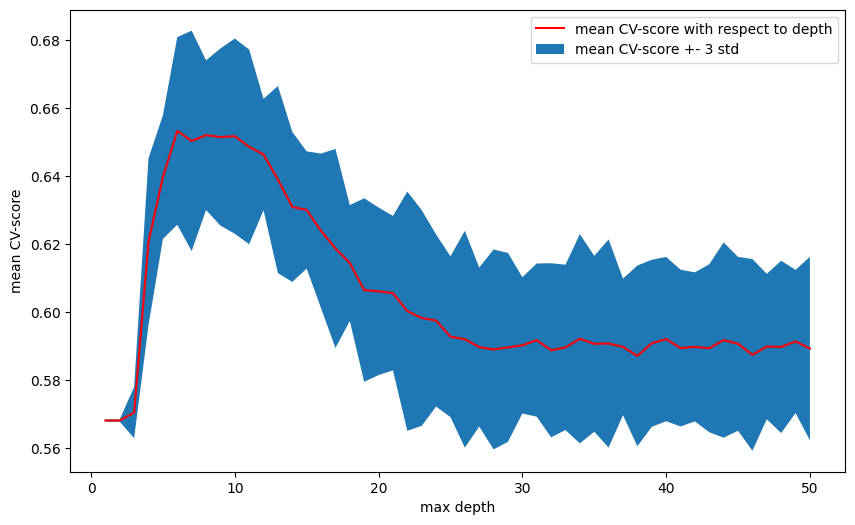

In [129]:
plt.figure(figsize=(10, 6))
xs = dt_grid_searcher.param_grid["max_depth"]
plt.plot(xs, dt_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to depth")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, lable="mean CV-score +- 3 std")
plt.xlabel("max depth")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

As we can see, with max_depth greater than 31, the score isn't changing significant.

In [130]:
print("The best estimator is", dt_grid_searcher.best_estimator_, "with score", dt_grid_searcher.best_score_)

The best estimator is DecisionTreeClassifier(max_depth=6) with score 0.6533


 - **Logistic Regression penalty 1D Grid Search**
 


In [404]:
lr_clf = LogisticRegression(solver='saga', l1_ratio=0.7)
lr_grid = {"penalty": ['l1', 'l2', 'elasticnet', 'none']}

In [405]:
lr_grid_searcher = GridSearchCV(lr_clf, param_grid=lr_grid, n_jobs=-1, cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train, y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(l1_ratio=0.7, solver='saga'),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True)

12.7 seconds

In [406]:
means = lr_grid_searcher.cv_results_["mean_test_score"]
stds = lr_grid_searcher.cv_results_["std_test_score"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


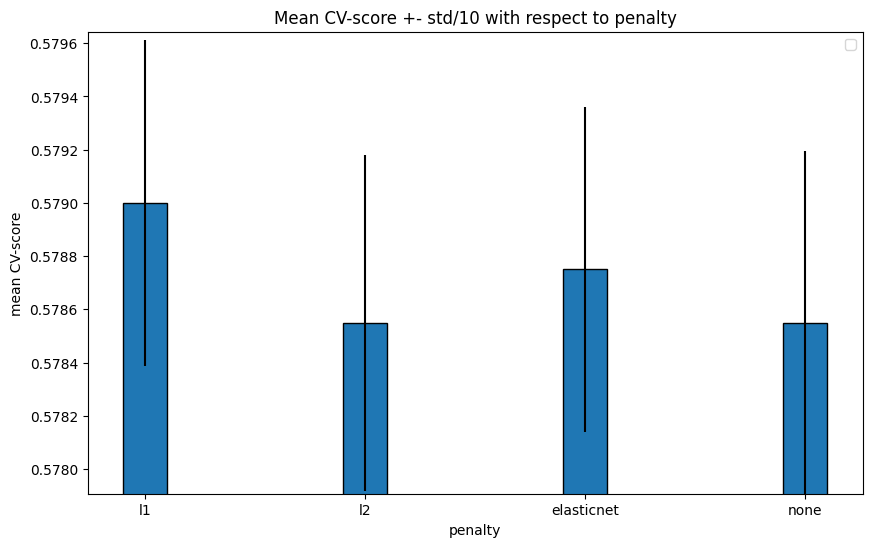

In [407]:
from turtle import down, width

plt.figure(figsize=(10, 6))
xs = lr_grid_searcher.param_grid["penalty"]
plt.bar(xs, means, edgecolor = 'black', yerr = stds / 10, width=0.2)
plt.title("Mean CV-score +- std/10 with respect to penalty")
plt.xlabel("penalty")
plt.ylabel("mean CV-score")
plt.ylim(bottom= min(means) - max(stds/10), top = max(means) + max(stds/10))
plt.legend()
plt.show()

As we can see, all scores are very similar.

In [409]:
print("The best estimator is", lr_grid_searcher.best_estimator_, "with score", lr_grid_searcher.best_score_)

The best estimator is LogisticRegression(l1_ratio=0.7, penalty='l1', solver='saga') with score 0.579


 - **RandomForest n_estimators 1D Grid Search** 
 


In [176]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(1, 201)
}

In [177]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  8...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200])},
             return_train_score=True)

177 minutes

In [178]:
means = rf_grid_searcher.cv_results_["mean_test_score"]
stds = rf_grid_searcher.cv_results_["std_test_score"]

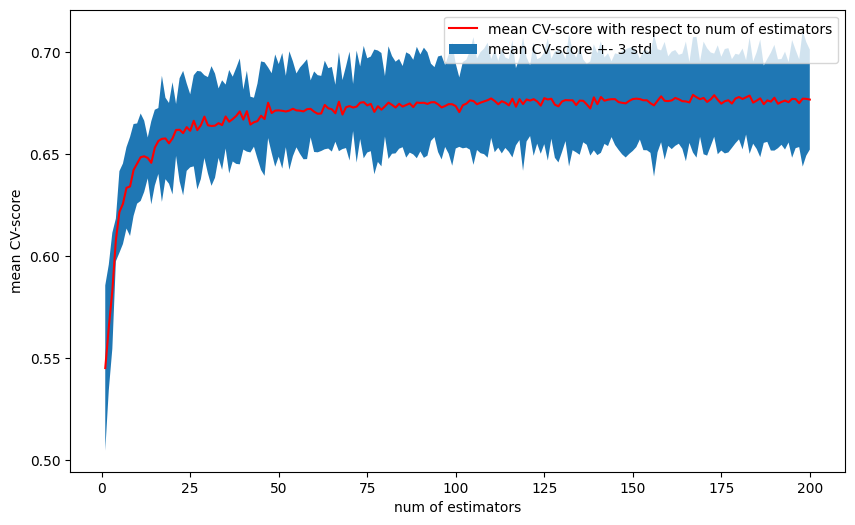

In [179]:
plt.figure(figsize=(10, 6))
xs = rf_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, rf_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to num of estimators")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("num of estimators")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

As we can see, with n_estimators greater than about 50, the score isn't changing significant.

In [263]:
print("The best estimator is", rf_grid_searcher.best_estimator_, "with score", rf_grid_searcher.best_score_)

The best estimator is RandomForestClassifier(n_estimators=167) with score 0.6790499999999999


 - **After all of this grid search procedures, let's view to the results**

In [284]:
best_classifiers = [knn_grid_searcher.best_estimator_, lr_grid_searcher.best_estimator_, dt_grid_searcher.best_estimator_, rf_grid_searcher.best_estimator_]
best_clf_predictions = []
best_clf_predictions.append(best_classifiers[0].predict(X_test_smaller))
for i in range(1, 4):
    pred = best_classifiers[i].predict(X_test)
    best_clf_predictions.append(pred)

In [285]:
accuracies_new = [accuracy_score(y_test, pred) for pred in best_clf_predictions]
micro_precisions_new = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in best_clf_predictions] 
micro_recalls_new = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in best_clf_predictions] 
macro_precisions_new = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in best_clf_predictions] 
macro_recalls_new = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in best_clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, accuracies_new, micro_precisions_new, micro_recalls_new, macro_precisions_new, macro_recalls_new]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "New Accuracies", "New Micro-Precisions", "New Micro-Recalls",  "New Macro-Precisions", "New Macro-Recalls"]

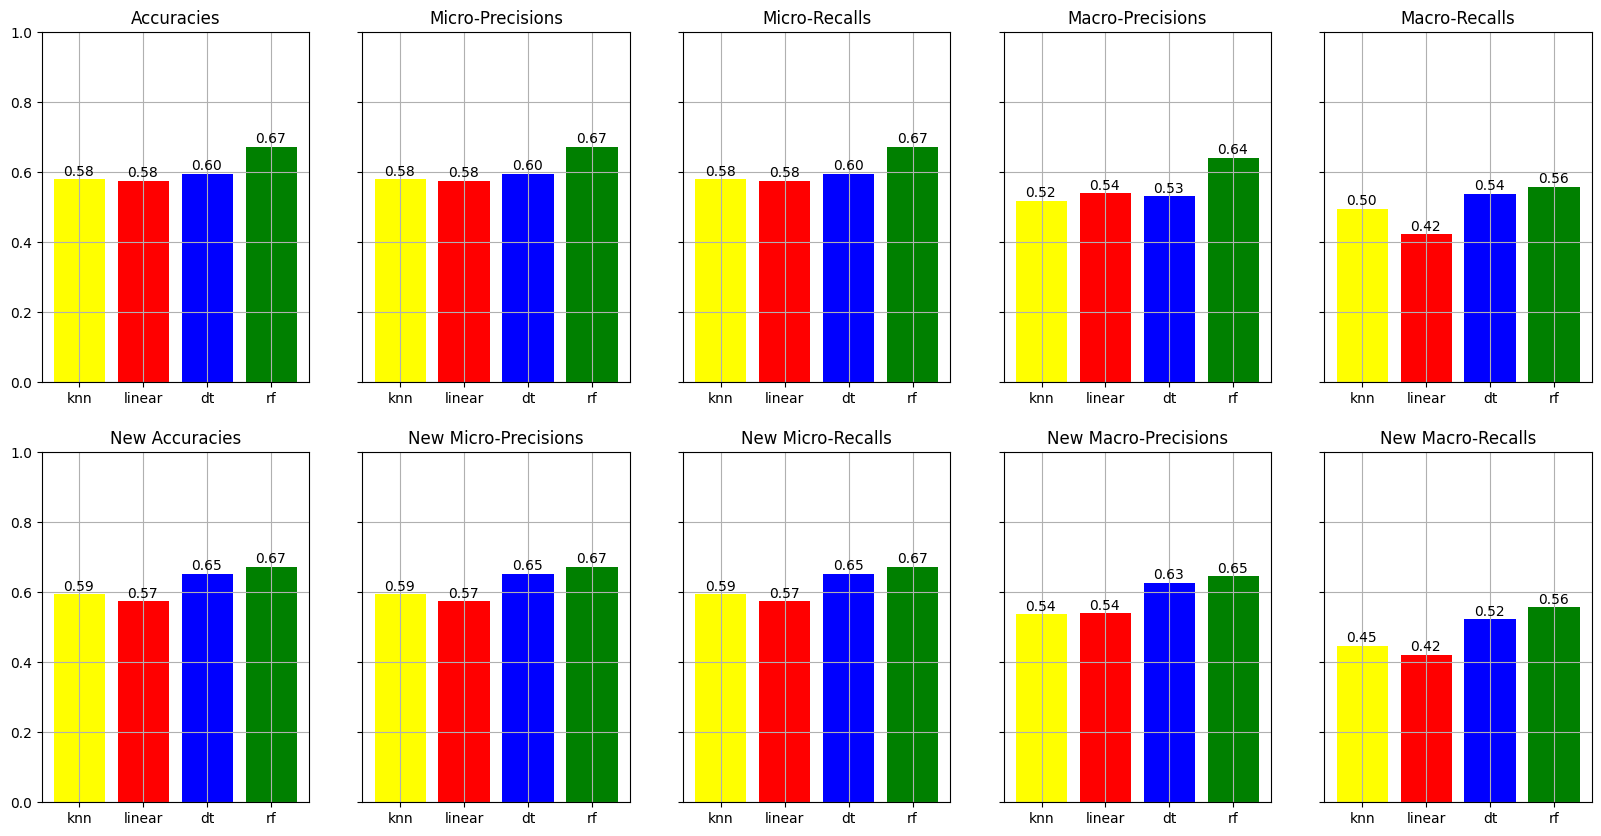

In [286]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for i in range(2):
    for ax, score, name in zip(axs[i], scores[5*i:(5*i+5)], names[5*i:(5*i+5)]):
        ax.bar(xticks, score, color=colors)
        for i, v in enumerate(score):
            ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels)
        ax.set_title(name)
        ax.grid()

plt.show()

The most visible result is for decision tree, however, in general, the increase is negligible.

**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

- **KNN n_neighbors and metric 2D Grid Search**  

To make this calculations less computationally expensive, we will use n_neighbors grid from 1 to 49 with step 3. So we have only 17 values of n_neighbors for 3 metrics, there are 51 grid nodes, which very close to our 1D grid.

In [319]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 51, 3),
    "metric": ['euclidean', 'manhattan', 'chebyshev']
}
print(knn_grid)

{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]), 'metric': ['euclidean', 'manhattan', 'chebyshev']}


In [320]:
knn_2D_grid_searcher = GridSearchCV(knn_clf, param_grid=knn_grid, n_jobs=-1, cv=5, return_train_score=True)
knn_2D_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])},
             return_train_score=True)

Look at that, we have the same time: 8:38 vs 9:09 minutes

In [321]:
means = knn_2D_grid_searcher.cv_results_["mean_test_score"]
stds = knn_2D_grid_searcher.cv_results_["std_test_score"]

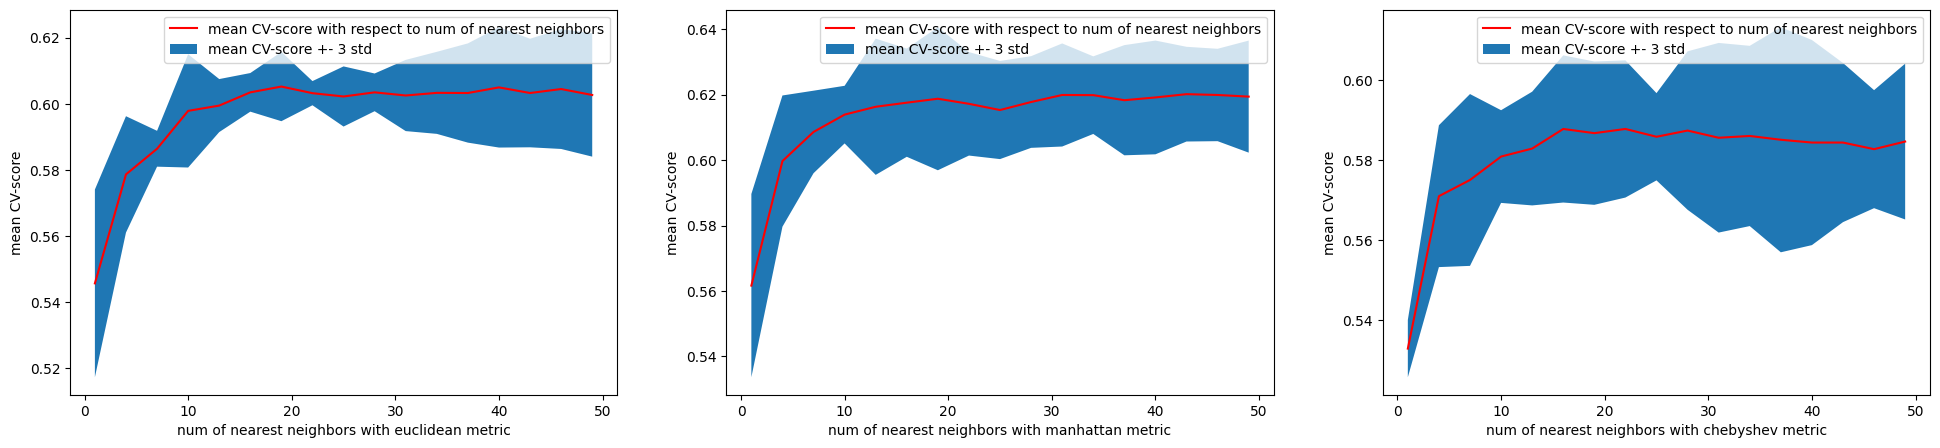

In [336]:
fig, axs = plt.subplots(1,3, figsize=(24, 5))

xs = knn_2D_grid_searcher.param_grid["n_neighbors"]
for i in range(3):
    axs[i].plot(xs, means[17*i:(17*i+17)], c='r', label="mean CV-score with respect to num of nearest neighbors")
    axs[i].fill_between(xs, means[17*i:(17*i+17)] - 3 * stds[17*i:(17*i+17)], means[17*i:(17*i+17)] + 3 * stds[17*i:(17*i+17)], label="mean CV-score +- 3 std")
    axs[i].set_xlabel("num of nearest neighbors with %s metric" %knn_2D_grid_searcher.param_grid["metric"][i])
    axs[i].set_ylabel("mean CV-score")
    axs[i].legend()
    
plt.show()

In [470]:
print("The best estimator is", knn_2D_grid_searcher.best_estimator_, "with score", knn_2D_grid_searcher.best_score_)

The best estimator is KNeighborsClassifier(metric='manhattan', n_neighbors=43) with score 0.62015


We can see, that now best n_neighbors is 43 vs 26 in 1D grid search, and there is another metric: manhattan vs minkowski (default). And score is looking better.

 - **Decision Tree max_depth and criterion 2D Grid Search** 
 
To make this calculations less computationally expensive, as we have 31 features, let's use max_depth from 2 to 30. So we have only 29 values of max_depth for 2 criterions, which not far a lot from our 1D grid.

In [491]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth": np.arange(2, 31),
    "criterion": ['gini', 'entropy']
}

In [492]:
dt_2D_grid_searcher = GridSearchCV(dt_clf, param_grid=dt_grid, n_jobs=-1, cv=5, return_train_score=True)
dt_2D_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             return_train_score=True)

Here the time difference is already greater, but not a lot: 3:59 vs 4:38 minutes.

In [500]:
means = dt_2D_grid_searcher.cv_results_["mean_test_score"]
stds = dt_2D_grid_searcher.cv_results_["std_test_score"]

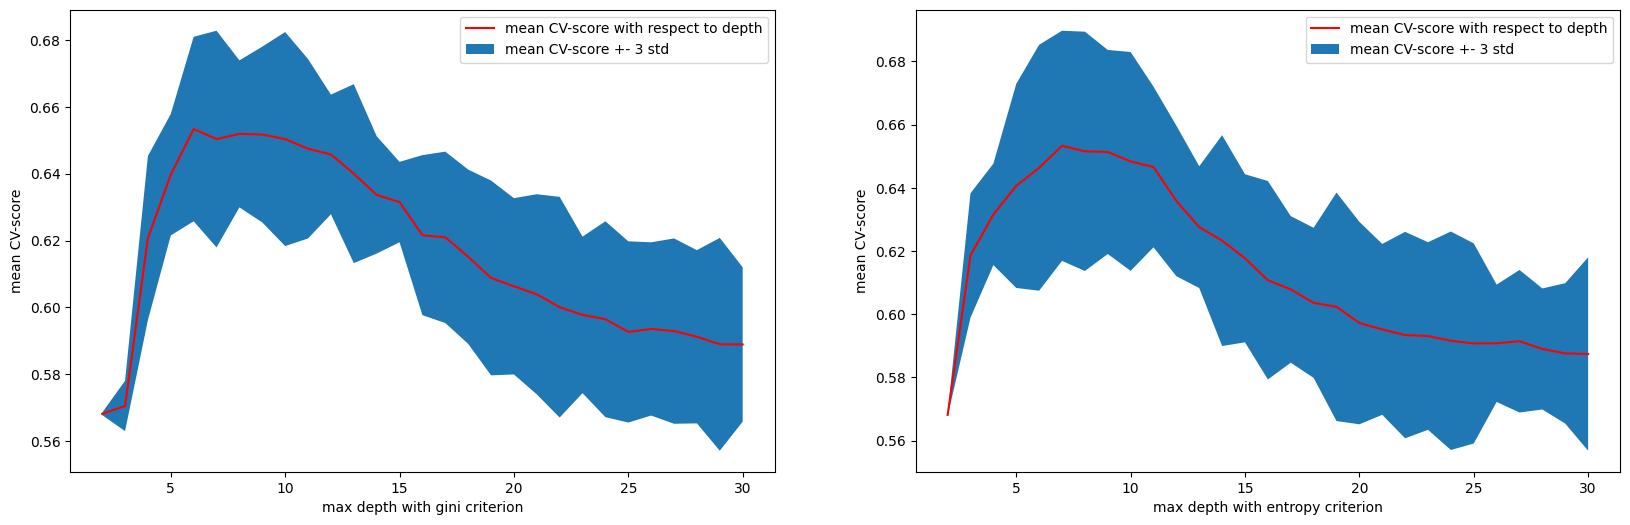

In [501]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))

xs = dt_2D_grid_searcher.param_grid["max_depth"]
for i in range(2):
    axs[i].plot(xs, means[29*i:(29*i+29)], c='r', label="mean CV-score with respect to depth")
    axs[i].fill_between(xs, means[29*i:(29*i+29)] - 3 * stds[29*i:(29*i+29)], means[29*i:(29*i+29)] + 3 * stds[29*i:(29*i+29)], label="mean CV-score +- 3 std")
    axs[i].set_xlabel("max depth with %s criterion" %dt_2D_grid_searcher.param_grid["criterion"][i])
    axs[i].set_ylabel("mean CV-score")
    axs[i].legend()
    
plt.show()


In [495]:
print("The best estimator is", dt_2D_grid_searcher.best_estimator_, "with score", dt_2D_grid_searcher.best_score_)
print(dt_2D_grid_searcher.best_params_)

The best estimator is DecisionTreeClassifier(max_depth=6) with score 0.65335
{'criterion': 'gini', 'max_depth': 6}


We have the same results as  for 1D grid search. Max depth is 6 but with criterion gini (default).

 - **Logistic Regression penalty and C 2D Grid Search**
 
To make this calculations less computationally expensive, we will use only 3 folds in cross-validation. And let's make grid from two parts:  C values from 0.001 to 1 with step 0.01 and C values from 1 to 1000 with step 2.   

In [422]:
arr1 = list(np.arange(0.001, 1, 0.01))
arr2 = list(np.arange(1, 1000, 2))

lr_clf = LogisticRegression(solver='saga', l1_ratio=0.7)
lr_grid = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": arr1 }

In [423]:
lr_2D_grid_searcher = GridSearchCV(lr_clf, param_grid=lr_grid, n_jobs=-1, cv=3, return_train_score=True)
lr_2D_grid_searcher.fit(X_train, y_train)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1109: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(l1_ratio=0.7, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.011, 0.020999999999999998,
                               0.030999999999999996, 0.040999999999999995,
                               0.05099999999999999, 0.06099999999999999, 0.071,
                               0.08099999999999999, 0.09099999999999998,
                               0.10099999999999998, 0.11099999999999999,
                               0.12099999999999998, 0.13099999999999998, 0.141,
                               0...99999999997, 0.16099999999999998,
                               0.17099999999999999, 0.18099999999999997,
                               0.19099999999999998, 0.20099999999999996,
                               0.21099999999999997, 0.22099999999999997,
                               0.23099999999999996, 0.24099999999999996,
                               0.25099999999999995, 0.26099999999999995,
                               0.27099999999999996, 0.28099999999999997, 0.291, ...],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True)

As we can see, the time is about twice as long as for the kNN or decision tree and much more than for the 1D grid: 12.7 sec vs 7:47 min. But on the other hand, we were able to check more values ​​of the parameter C, which we didn't do in a 1D grid, and all this in just about eight minutes.

In [427]:
means = lr_2D_grid_searcher.cv_results_["mean_test_score"]
stds = lr_2D_grid_searcher.cv_results_["std_test_score"]
best_idx = lr_2D_grid_searcher.best_index_

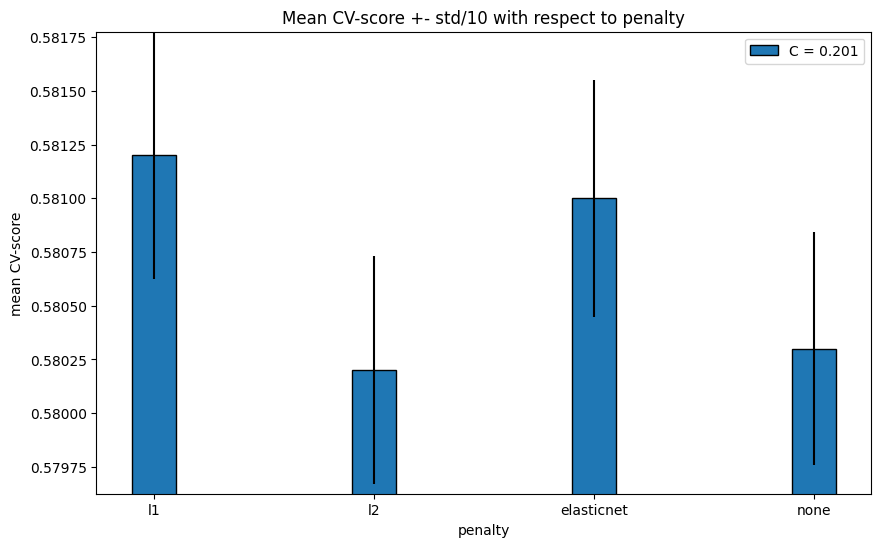

In [438]:
from turtle import down, width

plt.figure(figsize=(10, 6))
xs = lr_2D_grid_searcher.param_grid["penalty"]
plt.bar(xs, means[best_idx:(best_idx+4)], edgecolor = 'black', yerr = stds[best_idx:(best_idx+4)] / 10, width=0.2, label="C = %g" %lr_2D_grid_searcher.best_params_["C"])
plt.title("Mean CV-score +- std/10 with respect to penalty")
plt.xlabel("penalty")
plt.ylabel("mean CV-score")
plt.ylim(bottom= min(means[best_idx:(best_idx+4)]) - max(stds[best_idx:(best_idx+4)]/10), top = max(means[best_idx:(best_idx+4)]) + max(stds[best_idx:(best_idx+4)]/10))
plt.legend()
plt.show()

As we can see, the scores are more different, than in 1D grid search. Best C value is 0.201 vs 1 (default) with same l1 penalty.

In [425]:
print("The best estimator is", lr_2D_grid_searcher.best_estimator_, "with score", lr_2D_grid_searcher.best_score_)

The best estimator is LogisticRegression(C=0.20099999999999996, l1_ratio=0.7, penalty='l1',
                   solver='saga') with score 0.5812003129216476


Score is slightly better then for 1D grid but we should remember that we use less number of folds in cross-validation.

 - **RandomForest n_estimators and max_features 2D Grid Search** 
 
Since training was the most expensive for this model, we use the result from the 1D grid search. Let's use another 1D grid search for max_features, but use n_estimators=167 (best value from the previos 1D grid search). 

In [439]:
rf_clf = RandomForestClassifier(n_estimators=167)
rf_grid = {
    "max_features": np.arange(1, 31)
}

In [440]:
rf_2D_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_2D_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=167),
             n_jobs=-1,
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             return_train_score=True)

Even so, the search still is quite expensive, but some less than previous 1D grid search for Random Forest model: 177 vs 98 minutes.

In [502]:
means = rf_2D_grid_searcher.cv_results_["mean_test_score"]
stds = rf_2D_grid_searcher.cv_results_["std_test_score"]

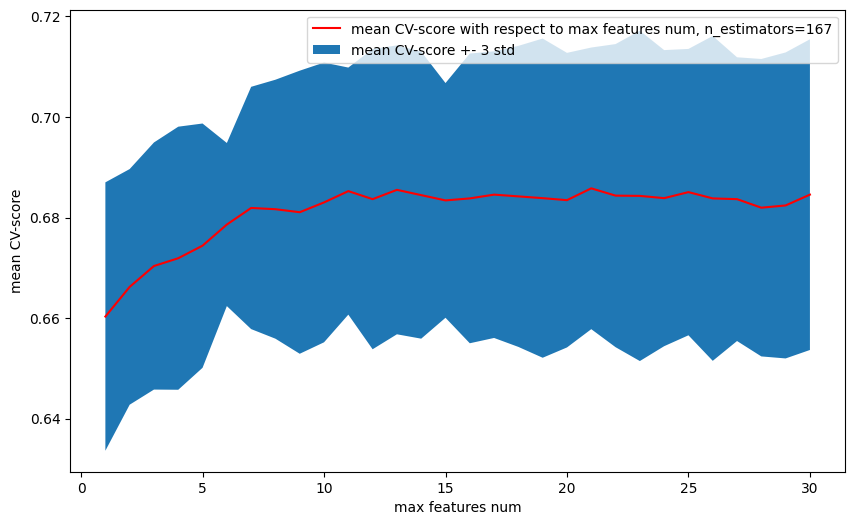

In [503]:
plt.figure(figsize=(10, 6))
xs = rf_2D_grid_searcher.param_grid["max_features"]
plt.plot(xs, rf_2D_grid_searcher.cv_results_["mean_test_score"], c='r', label="mean CV-score with respect to max features num, n_estimators=167")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("max features num")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

As we can see, using more than 10 features doesn't make significant variations.

In [445]:
print("The best estimator is", rf_2D_grid_searcher.best_estimator_, "with score", rf_2D_grid_searcher.best_score_)

The best estimator is RandomForestClassifier(max_features=21, n_estimators=167) with score 0.6858000000000001


Model says that 21 features is optimal max_features, but using 10, score doesn't change a lot

 - **Let's compare all results**

In [446]:
best_2D_classifiers = [knn_2D_grid_searcher.best_estimator_, lr_2D_grid_searcher.best_estimator_, dt_2D_grid_searcher.best_estimator_, rf_2D_grid_searcher.best_estimator_]
best_2D_clf_predictions = []
for i in range(0, 4):
    pred = best_2D_classifiers[i].predict(X_test)
    best_2D_clf_predictions.append(pred)

In [447]:
accuracies_new_2D = [accuracy_score(y_test, pred) for pred in best_2D_clf_predictions]
micro_precisions_new_2D = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in best_2D_clf_predictions] 
micro_recalls_new_2D = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in best_2D_clf_predictions] 
macro_precisions_new_2D = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in best_2D_clf_predictions] 
macro_recalls_new_2D = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in best_2D_clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, accuracies_new, micro_precisions_new, micro_recalls_new, macro_precisions_new, macro_recalls_new, accuracies_new_2D, micro_precisions_new_2D, micro_recalls_new_2D, macro_precisions_new_2D, macro_recalls_new_2D]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "New Accuracies", "New Micro-Precisions", "New Micro-Recalls",  "New Macro-Precisions", "New Macro-Recalls", "New Accuracies 2D", "New Micro-Precisions 2D", "New Micro-Recalls 2D",  "New Macro-Precisions 2D", "New Macro-Recalls 2D"]

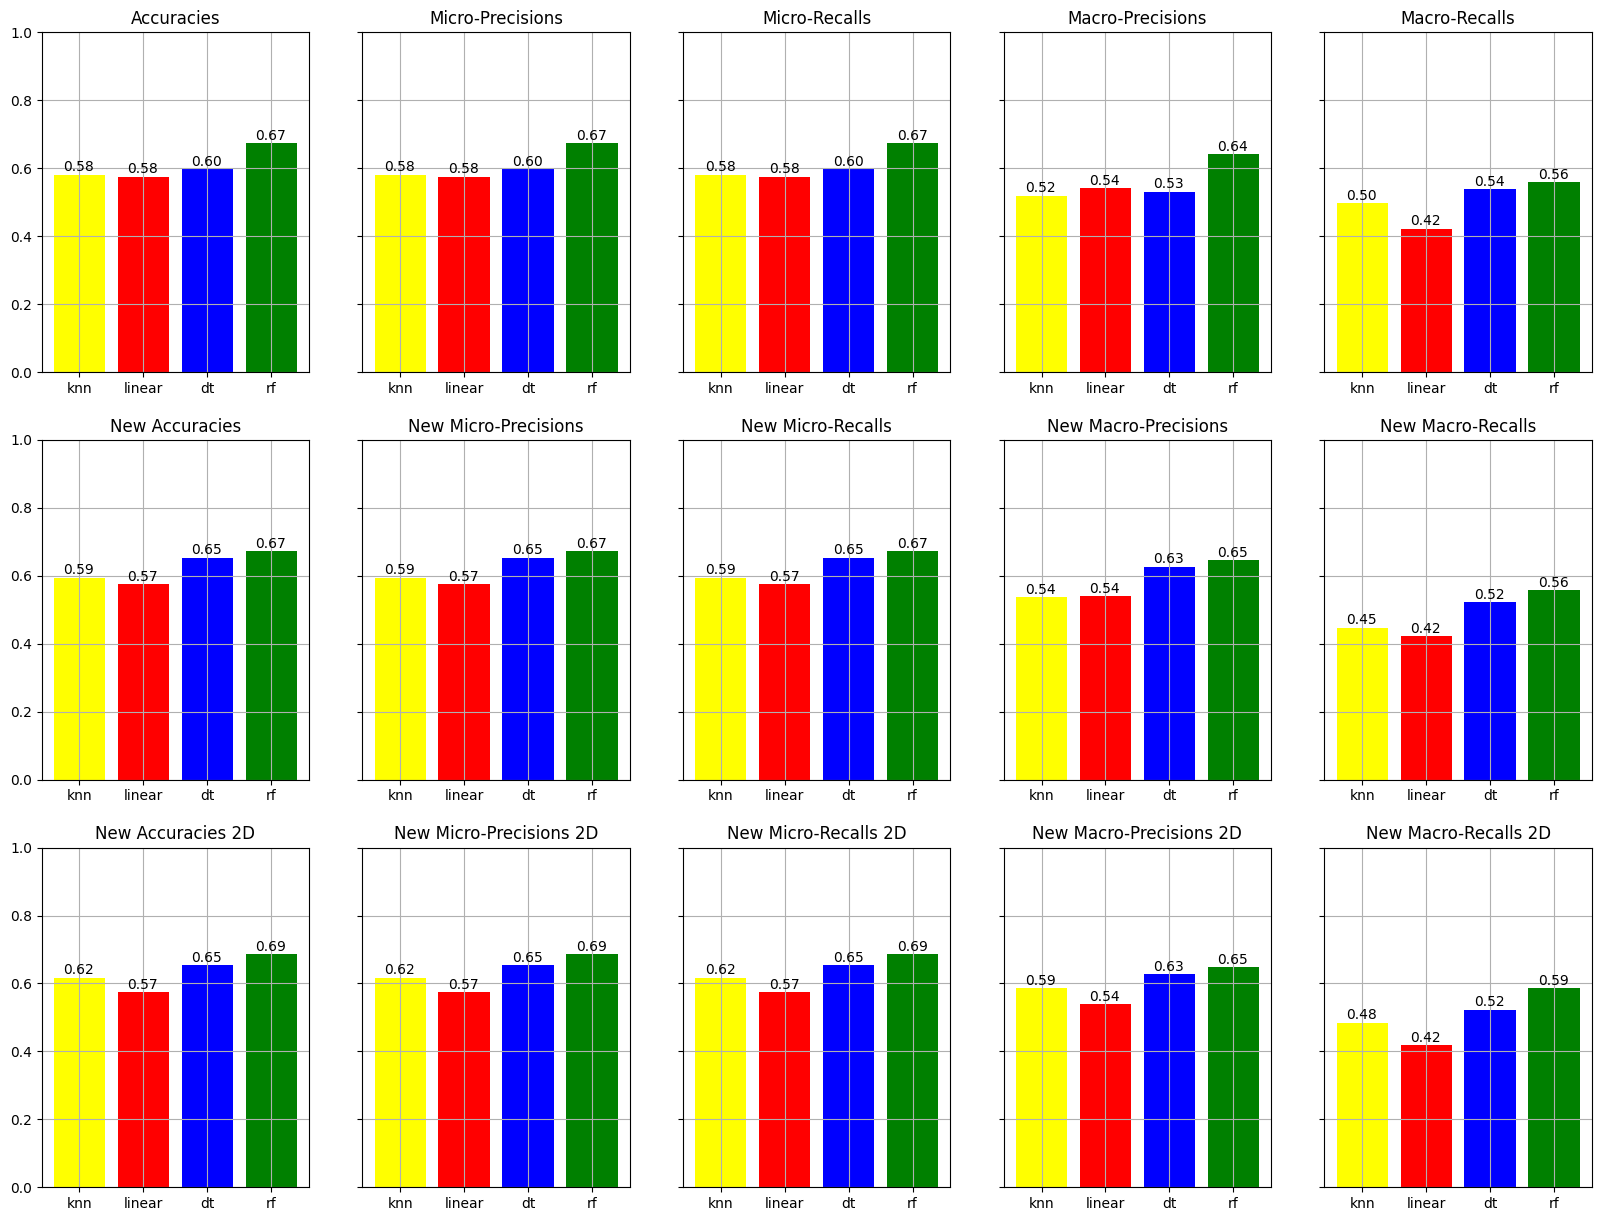

In [448]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 15), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for i in range(3):
    for ax, score, name in zip(axs[i], scores[5*i:(5*i+5)], names[5*i:(5*i+5)]):
        ax.bar(xticks, score, color=colors)
        for i, v in enumerate(score):
            ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels)
        ax.set_title(name)
        ax.grid()

plt.show()

There are better results vs 1D grid search for kNN and Random Forest. Logistic Regression and  Decision Tree haven't changed. For the Decision Tree 1D and 2D grid search give the same parameters. For the Logistic Regression we have shown that changing the parameters doesn't give significant changes.

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [479]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1030261,27,269,8954,4,45,8,10,t,r,...,0,0,0,0,0,0,0,0,0,2
1,419144,11,765,2964,2,65,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
2,543923,22,378,9559,2,30,10,4,t,r,...,0,0,0,0,0,0,0,0,0,2
3,495911,10,310,6799,2,10,5,4,t,w,...,0,0,0,0,0,0,0,0,0,1
4,347963,18,321,2911,1,20,15,2,t,r,...,0,0,0,0,0,0,0,0,0,3


In [480]:
objects_with_dummies = pd.get_dummies(data)

X = np.array(objects_with_dummies._get_numeric_data().drop(columns="damage_grade"))
y = np.array(objects_with_dummies._get_numeric_data()["damage_grade"])

assert X.shape == (35000, 69) and  y.shape == (35000,)

In [481]:
objects_with_dummies.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1030261,27,269,8954,4,45,8,10,0,0,...,0,0,0,0,0,0,0,0,1,0
1,419144,11,765,2964,2,65,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
2,543923,22,378,9559,2,30,10,4,0,1,...,0,0,0,0,0,0,0,0,1,0
3,495911,10,310,6799,2,10,5,4,1,0,...,0,0,0,0,0,0,0,0,1,0
4,347963,18,321,2911,1,20,15,2,0,1,...,0,0,0,0,0,0,0,0,1,0


In [482]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [483]:
X_train_cf, X_not_train_cf, y_train_cf, y_not_train_cf = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify= y,
                                                    random_state=RANDOM_SEED)

X_test_cf, X_val_cf, y_test_cf, y_val_cf = train_test_split(X_not_train_cf, y_not_train_cf, test_size= 1/3, 
                                                    shuffle=True, stratify= y_not_train_cf,
                                                    random_state=RANDOM_SEED)
assert X_train_cf.shape[0] == 20000 and X_test_cf.shape[0] == 10000 and X_val_cf.shape[0] == 5000

What was your best model before adding categorical features?  
  - **Your answer here**: Random Forest

Use GridSearch + 5-fold CV on **train set** to define your new best model.

**To make calculations less computationally expensive, we use the same methods**

- **KNN n_neighbors and metric 2D Grid Search with categorical features**  

We will use n_neighbors grid from 1 to 49 with step 3.

In [484]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 51, 3),
    "metric": ['euclidean', 'manhattan', 'chebyshev']
}
print(knn_grid)

{'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]), 'metric': ['euclidean', 'manhattan', 'chebyshev']}


In [485]:
knn_2D_cf_grid_searcher = GridSearchCV(knn_clf, param_grid=knn_grid, n_jobs=-1, cv=5, return_train_score=True)
knn_2D_cf_grid_searcher.fit(X_train_cf, y_train_cf)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])},
             return_train_score=True)

16:44 minutes

In [486]:
means = knn_2D_cf_grid_searcher.cv_results_["mean_test_score"]
stds = knn_2D_cf_grid_searcher.cv_results_["std_test_score"]

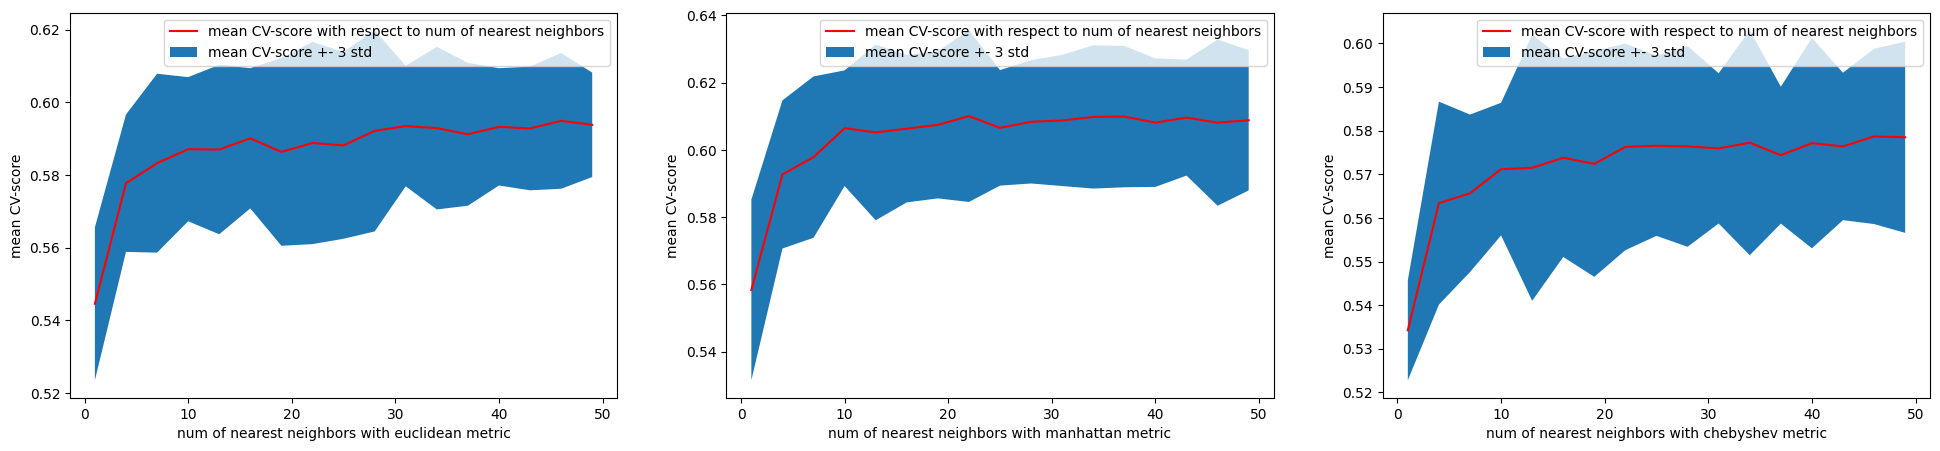

In [487]:
fig, axs = plt.subplots(1,3, figsize=(24, 5))

xs = knn_2D_cf_grid_searcher.param_grid["n_neighbors"]
for i in range(3):
    axs[i].plot(xs, means[17*i:(17*i+17)], c='r', label="mean CV-score with respect to num of nearest neighbors")
    axs[i].fill_between(xs, means[17*i:(17*i+17)] - 3 * stds[17*i:(17*i+17)], means[17*i:(17*i+17)] + 3 * stds[17*i:(17*i+17)], label="mean CV-score +- 3 std")
    axs[i].set_xlabel("num of nearest neighbors with %s metric" %knn_2D_cf_grid_searcher.param_grid["metric"][i])
    axs[i].set_ylabel("mean CV-score")
    axs[i].legend()
    
plt.show()

In [488]:
print("The best estimator is", knn_2D_cf_grid_searcher.best_estimator_, "with score", knn_2D_cf_grid_searcher.best_score_)

The best estimator is KNeighborsClassifier(metric='manhattan', n_neighbors=22) with score 0.61005


We can see, that now best n_neighbors is 22 vs 26 and 43 in 1D and 2D grid search, and there is manhattan metric again. But score is slightly worst.

 - **Decision Tree max_depth and criterion 2D Grid Search with categorical features** 
 
We use max_depth from 2 to 30.

In [496]:
dt_clf = DecisionTreeClassifier()
dt_grid = {
    "max_depth": np.arange(2, 31),
    "criterion": ['gini', 'entropy']
}

In [497]:
dt_2D_cf_grid_searcher = GridSearchCV(dt_clf, param_grid=dt_grid, n_jobs=-1, cv=5, return_train_score=True)
dt_2D_cf_grid_searcher.fit(X_train_cf, y_train_cf)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             return_train_score=True)

13:47 minutes

In [504]:
means = dt_2D_cf_grid_searcher.cv_results_["mean_test_score"]
stds = dt_2D_cf_grid_searcher.cv_results_["std_test_score"]

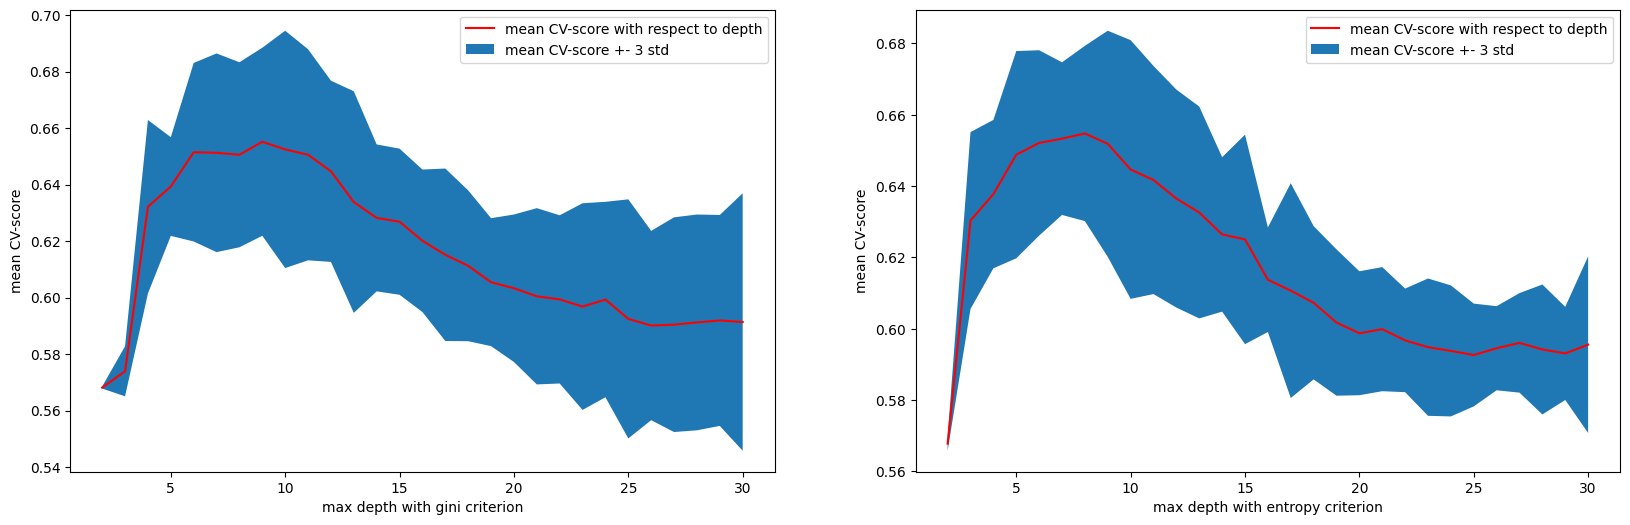

In [505]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))

xs = dt_2D_cf_grid_searcher.param_grid["max_depth"]
for i in range(2):
    axs[i].plot(xs, means[29*i:(29*i+29)], c='r', label="mean CV-score with respect to depth")
    axs[i].fill_between(xs, means[29*i:(29*i+29)] - 3 * stds[29*i:(29*i+29)], means[29*i:(29*i+29)] + 3 * stds[29*i:(29*i+29)], label="mean CV-score +- 3 std")
    axs[i].set_xlabel("max depth with %s criterion" %dt_2D_cf_grid_searcher.param_grid["criterion"][i])
    axs[i].set_ylabel("mean CV-score")
    axs[i].legend()
    
plt.show()

In [506]:
print("The best estimator is", dt_2D_cf_grid_searcher.best_estimator_, "with score", dt_2D_cf_grid_searcher.best_score_)
print(dt_2D_cf_grid_searcher.best_params_)

The best estimator is DecisionTreeClassifier(max_depth=9) with score 0.65515
{'criterion': 'gini', 'max_depth': 9}


We have the same score results as before. But max_depth is 9 now with criterion gini (default).

 - **Logistic Regression penalty and C 2D Grid Search with categorical features**
 
We make grid from two parts: C values from 0.001 to 1 with step 0.01 and C values from 1 to 1000 with step 10. In the second part, we will take a larger step, since the optimal value turned out to be in the first part.

In [507]:
arr1 = list(np.arange(0.001, 1, 0.01))
arr2 = list(np.arange(1, 1000, 10))

lr_clf = LogisticRegression(solver='saga', l1_ratio=0.7)
lr_grid = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": arr1 }

In [508]:
lr_2D_cf_grid_searcher = GridSearchCV(lr_clf, param_grid=lr_grid, n_jobs=-1, cv=5, return_train_score=True)
lr_2D_cf_grid_searcher.fit(X_train_cf, y_train_cf)

c:\Users\timo2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(l1_ratio=0.7, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.011, 0.020999999999999998,
                               0.030999999999999996, 0.040999999999999995,
                               0.05099999999999999, 0.06099999999999999, 0.071,
                               0.08099999999999999, 0.09099999999999998,
                               0.10099999999999998, 0.11099999999999999,
                               0.12099999999999998, 0.13099999999999998, 0.141,
                               0...99999999997, 0.16099999999999998,
                               0.17099999999999999, 0.18099999999999997,
                               0.19099999999999998, 0.20099999999999996,
                               0.21099999999999997, 0.22099999999999997,
                               0.23099999999999996, 0.24099999999999996,
                               0.25099999999999995, 0.26099999999999995,
                               0.27099999999999996, 0.28099999999999997, 0.291, ...],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True)

27:18 minutes

In [509]:
means = lr_2D_cf_grid_searcher.cv_results_["mean_test_score"]
stds = lr_2D_cf_grid_searcher.cv_results_["std_test_score"]
best_idx = lr_2D_cf_grid_searcher.best_index_

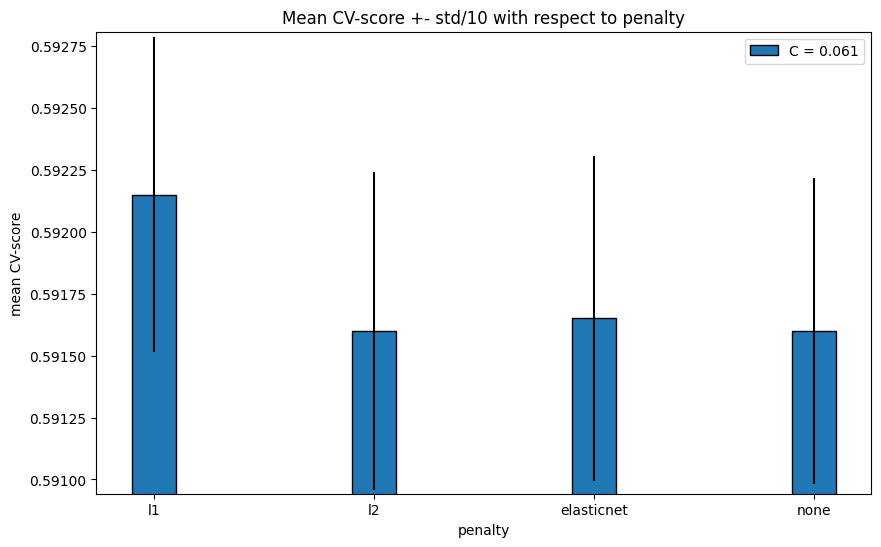

In [510]:
from turtle import down, width

plt.figure(figsize=(10, 6))
xs = lr_2D_cf_grid_searcher.param_grid["penalty"]
plt.bar(xs, means[best_idx:(best_idx+4)], edgecolor = 'black', yerr = stds[best_idx:(best_idx+4)] / 10, width=0.2, label="C = %g" %lr_2D_cf_grid_searcher.best_params_["C"])
plt.title("Mean CV-score +- std/10 with respect to penalty")
plt.xlabel("penalty")
plt.ylabel("mean CV-score")
plt.ylim(bottom= min(means[best_idx:(best_idx+4)]) - max(stds[best_idx:(best_idx+4)]/10), top = max(means[best_idx:(best_idx+4)]) + max(stds[best_idx:(best_idx+4)]/10))
plt.legend()
plt.show()

Best C value is 0.061 vs previous 0.201 with same l1 penalty.

In [511]:
print("The best estimator is", lr_2D_cf_grid_searcher.best_estimator_, "with score", lr_2D_cf_grid_searcher.best_score_)

The best estimator is LogisticRegression(C=0.06099999999999999, l1_ratio=0.7, penalty='elasticnet',
                   solver='saga') with score 0.59215


Score is slightly better then for 2D grid.

 - **RandomForest n_estimators and max_features 2D Grid Search with categorical features** 
 
Since this is the most expensive model to train, and now we can't use the results of the previous trainings, let's use sparse grid: n_estimators from 50 to 180 with step 5 and max_features from 1 to 30 with step 3.

In [512]:
rf_clf = RandomForestClassifier()
rf_grid = {
    "n_estimators": np.arange(50, 181, 5),
    "max_features": np.arange(1, 31, 3)
}

In [513]:
rf_2D_cf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_2D_cf_grid_searcher.fit(X_train_cf, y_train_cf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=167),
             n_jobs=-1,
             param_grid={'max_features': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28]),
                         'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180])},
             return_train_score=True)

It was very hard: `770 minutes`.

In [519]:
print("The best estimator is", rf_2D_cf_grid_searcher.best_estimator_, "with score", rf_2D_cf_grid_searcher.best_score_)

The best estimator is RandomForestClassifier(max_features=25, n_estimators=135) with score 0.68875


And now I understand that I should take max_features from 1 to 69 :( 

 - **RandomForest n_estimators and max_features 2D Grid Search with categorical features SECOND ROUND** 
 
Since this is the `most expensive` model to train, let's use n_estimators=135 from previous 2D Grid Search with categorical features and sparse grid: max_features from 1 to 69 with step 5.

In [524]:
rf_clf = RandomForestClassifier(n_estimators=135)
rf_grid = {
    "max_features": np.arange(1, 70, 5)
}

In [525]:
rf_2D_cf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, n_jobs=-1, cv=5, return_train_score=True)
rf_2D_cf_grid_searcher.fit(X_train_cf, y_train_cf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=135),
             n_jobs=-1,
             param_grid={'max_features': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66])},
             return_train_score=True)

104 minutes

In [526]:
means = rf_2D_cf_grid_searcher.cv_results_["mean_test_score"]
stds = rf_2D_cf_grid_searcher.cv_results_["std_test_score"]
best_idx = rf_2D_cf_grid_searcher.best_index_

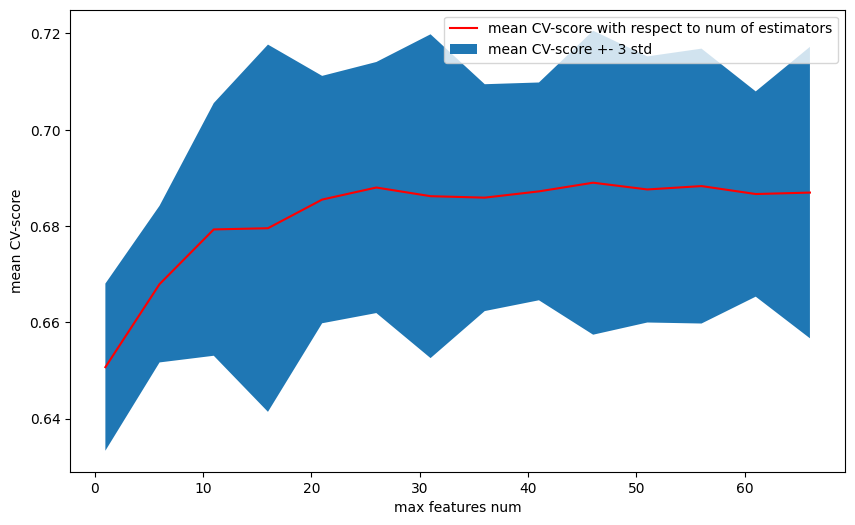

In [533]:
plt.figure(figsize=(10, 6))
xs = rf_2D_cf_grid_searcher.param_grid["max_features"]
plt.plot(xs, means, c='r', label="mean CV-score with respect to num of estimators")
plt.fill_between(xs, means - 3 * stds, means + 3 * stds, label="mean CV-score +- 3 std")
plt.xlabel("max features num")
plt.ylabel("mean CV-score")
plt.legend()
plt.show()

In [527]:
print("The best estimator is", rf_2D_cf_grid_searcher.best_estimator_, "with score", rf_2D_cf_grid_searcher.best_score_)

The best estimator is RandomForestClassifier(max_features=46, n_estimators=135) with score 0.6890000000000001


Model says that 46 features is optimal max_features vs 25 previous time, so that move have some sence.

 - **Let's compare all results again**

In [528]:
best_2D_cf_classifiers = [knn_2D_cf_grid_searcher.best_estimator_, lr_2D_cf_grid_searcher.best_estimator_, dt_2D_cf_grid_searcher.best_estimator_, rf_2D_cf_grid_searcher.best_estimator_]
best_2D_cf_clf_predictions = []
for i in range(0, 4):
    pred = best_2D_cf_classifiers[i].predict(X_test_cf)
    best_2D_cf_clf_predictions.append(pred)

In [529]:
accuracies_new_2D_cf = [accuracy_score(y_test_cf, pred) for pred in best_2D_cf_clf_predictions]
micro_precisions_new_2D_cf = [precision_score(y_test_cf, pred, average="micro", zero_division=1) for pred in best_2D_cf_clf_predictions] 
micro_recalls_new_2D_cf = [recall_score(y_test_cf, pred, average="micro", zero_division=1) for pred in best_2D_cf_clf_predictions] 
macro_precisions_new_2D_cf = [precision_score(y_test_cf, pred, average="macro", zero_division=1) for pred in best_2D_cf_clf_predictions] 
macro_recalls_new_2D_cf = [recall_score(y_test_cf, pred, average="macro", zero_division=1) for pred in best_2D_cf_clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls, accuracies_new, micro_precisions_new, micro_recalls_new, macro_precisions_new, macro_recalls_new, accuracies_new_2D, micro_precisions_new_2D, micro_recalls_new_2D, macro_precisions_new_2D, macro_recalls_new_2D, accuracies_new_2D_cf, micro_precisions_new_2D_cf, micro_recalls_new_2D_cf, macro_precisions_new_2D_cf, macro_recalls_new_2D_cf]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls", "New Accuracies", "New Micro-Precisions", "New Micro-Recalls",  "New Macro-Precisions", "New Macro-Recalls", "New Accuracies 2D", "New Micro-Precisions 2D", "New Micro-Recalls 2D",  "New Macro-Precisions 2D", "New Macro-Recalls 2D", "New Accuracies 2D cf", "New Micro-Precisions 2D cf", "New Micro-Recalls 2D cf",  "New Macro-Precisions 2D cf", "New Macro-Recalls 2D cf"]

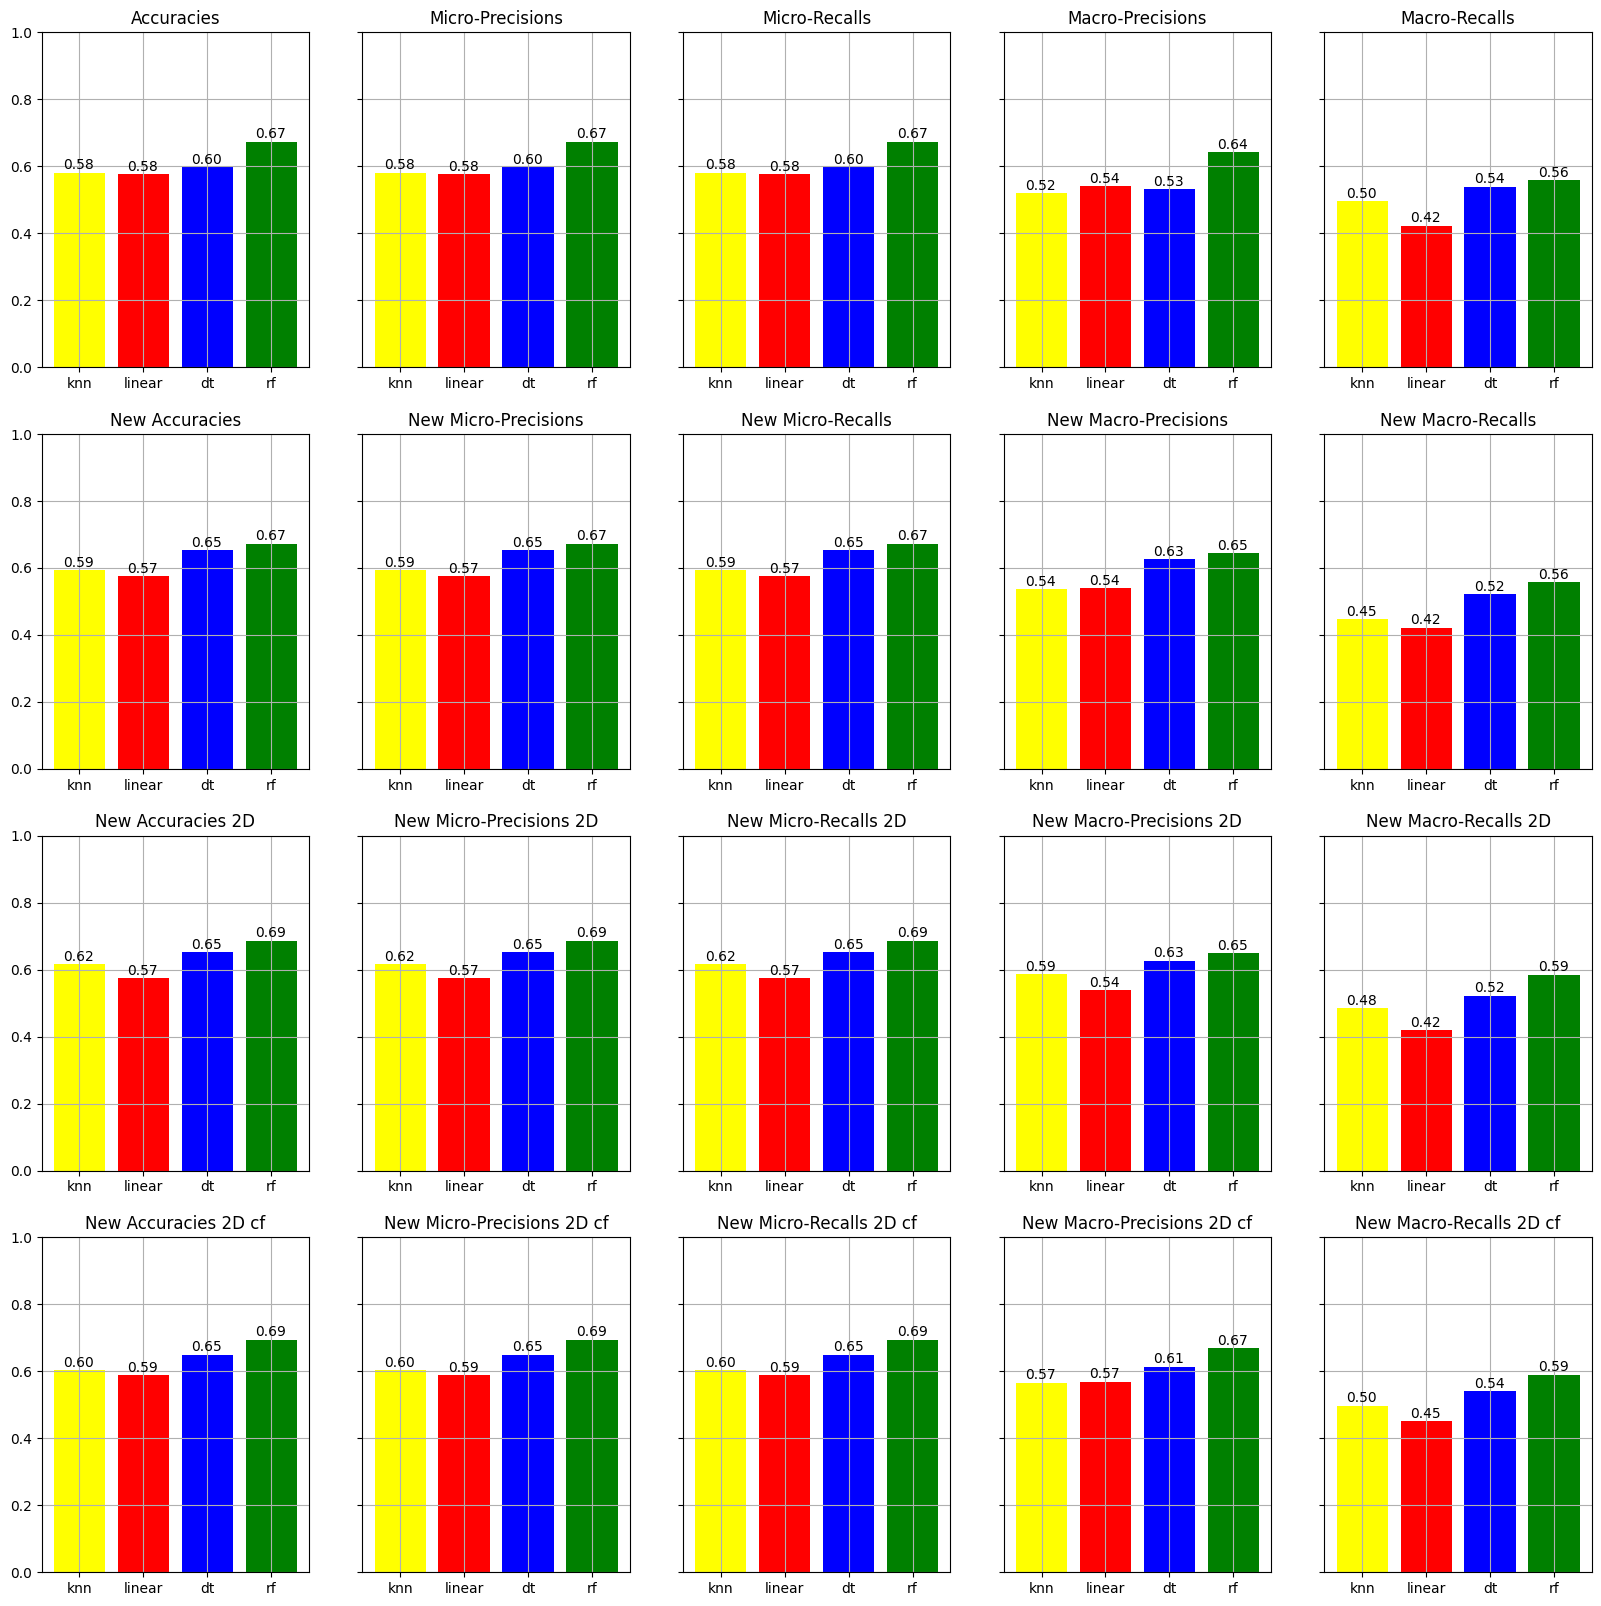

In [531]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 20), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for i in range(4):
    for ax, score, name in zip(axs[i], scores[5*i:(5*i+5)], names[5*i:(5*i+5)]):
        ax.bar(xticks, score, color=colors)
        for i, v in enumerate(score):
            ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels)
        ax.set_title(name)
        ax.grid()

plt.show()

There are a little worst result for kNN and a little god for Logistic Regression only.

Performance of which model increased the most? Why?

**Your answer here**: it is only Logistic Regression has positive delta score in that task. I think that problem is in too large features set, there are not more usful from them, but we try to use them all. 

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

**Two best models: Decision Tree (max_depth=6, criterion='gini') and Random Forest (max_features=21, n_estimators=167)**

In [534]:
cla_a = DecisionTreeClassifier(max_depth=6, criterion='gini')
cla_b = RandomForestClassifier(max_features=21, n_estimators=167)

Let's fit them on `train_set
`

In [535]:
cla_a.fit(X_train, y_train)
cla_b.fit(X_train, y_train)

RandomForestClassifier(max_features=21, n_estimators=167)

Then use `Voting classifier` 

In [540]:
from sklearn.ensemble import VotingClassifier

vc_clf = VotingClassifier(estimators=[('dt', cla_a), ('rf', cla_b)], voting='hard')

Fitting it on `train_set`

In [552]:
vc_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=6)),
                             ('rf',
                              RandomForestClassifier(max_features=21,
                                                     n_estimators=167))])

Now we can compare default Voting classifier with other our models

In [557]:
vc_pred = vc_clf.predict(X_test)
print("Mean squared error:", mean_squared_error(vc_pred, y_test))
print("Voting Classifier accuracy: %g" %accuracy_score(vc_pred, y_test), 
      "Voting Classifier micro-precision: %g" %precision_score(vc_pred, y_test, average="micro", zero_division=1),
      "Voting Classifier micro-recall: %g" %recall_score(vc_pred, y_test, average="micro", zero_division=1),
      "Voting Classifier macro-precision: %g" %precision_score(vc_pred, y_test, average="macro", zero_division=1),
      "Voting Classifier micro-recall: %g" %recall_score(vc_pred, y_test, average="macro", zero_division=1), sep='\n'
      )

Mean squared error: 0.3514
Voting Classifier accuracy: 0.6639
Voting Classifier micro-precision: 0.6639
Voting Classifier micro-recall: 0.6639
Voting Classifier macro-precision: 0.564409
Voting Classifier micro-recall: 0.645057


Accuracy and another metrics doesn's looks better. Random Forest has more interesting results by itself  
  
Ok, let's try to tune weights for that model. We will use simple grid

In [559]:
vc_grid = {
    "weights": [(a, 1 - a) for a in np.arange(0.05, 1, 0.05)]
}

In [560]:
vc_grid_searcher = GridSearchCV(vc_clf, param_grid=vc_grid, n_jobs=-1, cv=5, return_train_score=True)
vc_grid_searcher.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('dt',
                                                     DecisionTreeClassifier(max_depth=6)),
                                                    ('rf',
                                                     RandomForestClassifier(max_features=21,
                                                                            n_estimators=167))]),
             n_jobs=-1,
             param_grid={'weights': [(0.05, 0.95), (0.1, 0.9),
                                     (0.15000000000000002, 0.85), (0.2, 0.8),
                                     (0.25, 0.75), (0.3, 0.7),
                                     (0.35000000000000003, 0.6499999999999999),
                                     (0.4, 0.6), (0.45, 0.55), (0.5, 0.5),
                                     (0.55, 0.44999999999999996),
                                     (0.6000000000000001, 0.3999999999999999),
                                     (0.6500000000000001, 0.34999999999999987),
                                     (0.7000000000000001, 0.29999999999999993),
                                     (0.7500000000000001, 0.2499999999999999),
                                     (0.8, 0.19999999999999996),
                                     (0.8500000000000001, 0.1499999999999999),
                                     (0.9000000000000001, 0.09999999999999987),
                                     (0.9500000000000001,
                                      0.04999999999999993)]},
             return_train_score=True)

In [561]:
vc_pred = vc_grid_searcher.predict(X_val)

accuracie = accuracy_score(y_val, vc_pred)
micro_precision = precision_score(y_val, vc_pred, average="micro", zero_division=1)
micro_recall = recall_score(y_val, vc_pred, average="micro", zero_division=1) 
macro_precision = precision_score(y_val, vc_pred, average="macro", zero_division=1) 
macro_recall = recall_score(y_val, vc_pred, average="macro", zero_division=1) 

scores = [accuracie, micro_precision, micro_recall, macro_precision, macro_recall]
names = ["Accuracie", "Micro-Precision", "Micro-Recall",  "Macro-Precision", "Macro-Recall"]

There are new scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


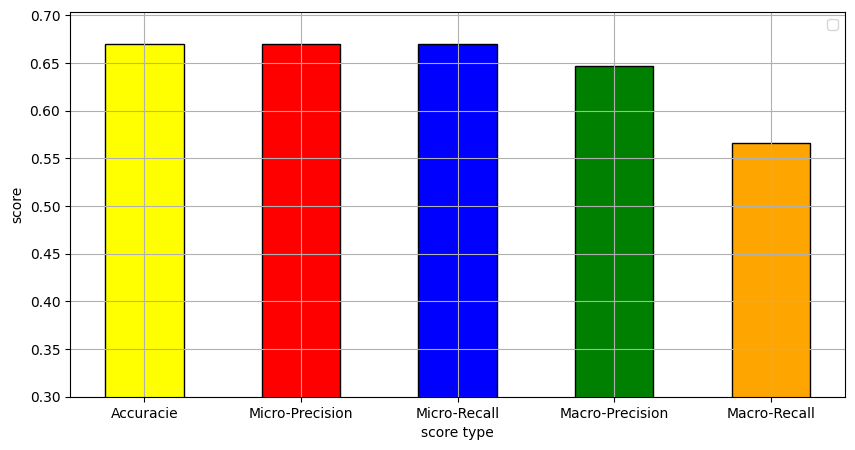

In [574]:
plt.figure(figsize=(10, 5))

colors = ["yellow", "red", "blue", "green", "orange"]
plt.bar(names, scores, edgecolor='black', color=colors, width=0.5)
plt.xlabel("score type")
plt.ylabel("score")
plt.ylim(bottom= 0.3)
plt.legend()
plt.grid()
plt.show()

In [577]:
print("Voting Classifier accuracy: %g" %scores[0], 
      "Voting Classifier micro-precision: %g" %scores[1],
      "Voting Classifier micro-recall: %g" %scores[2],
      "Voting Classifier macro-precision: %g" %scores[3],
      "Voting Classifier micro-recall: %g" %scores[4], sep='\n'
      )

Voting Classifier accuracy: 0.6702
Voting Classifier micro-precision: 0.6702
Voting Classifier micro-recall: 0.6702
Voting Classifier macro-precision: 0.646561
Voting Classifier micro-recall: 0.565722


Even after tunning our model can't beat Random Forest. But we should remember that model tunning and metrics calculation heva done on another data sets. 

In [578]:
print(vc_grid_searcher.best_estimator_)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=6)),
                             ('rf',
                              RandomForestClassifier(max_features=21,
                                                     n_estimators=167))],
                 weights=(0.25, 0.75))


As expected, more significant weight have Random Forest: rf/dt like 3/1

**Another pair: kNN (metric='manhattan', n_neighbors=43) and Random Forest (max_features=21, n_estimators=167)**

It looks strange try to pair `Tree` with `Forest`. After 2D grid search kNN had close to DecisionTree results (a little worst). So let's change *DecisionTree* to `kNN`

In [579]:
cla_a = KNeighborsClassifier(metric='manhattan', n_neighbors=43)
cla_b = RandomForestClassifier(max_features=21, n_estimators=167)

In [580]:
cla_a.fit(X_train, y_train)
cla_b.fit(X_train, y_train)

RandomForestClassifier(max_features=21, n_estimators=167)

In [581]:
from sklearn.ensemble import VotingClassifier

vc_clf = VotingClassifier(estimators=[('knn', cla_a), ('rf', cla_b)], voting='hard')

In [582]:
vc_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=43)),
                             ('rf',
                              RandomForestClassifier(max_features=21,
                                                     n_estimators=167))])

In [583]:
vc_pred = vc_clf.predict(X_test)
print("Mean squared error:", mean_squared_error(vc_pred, y_test))
print("Voting Classifier accuracy: %g" %accuracy_score(vc_pred, y_test), 
      "Voting Classifier micro-precision: %g" %precision_score(vc_pred, y_test, average="micro", zero_division=1),
      "Voting Classifier micro-recall: %g" %recall_score(vc_pred, y_test, average="micro", zero_division=1),
      "Voting Classifier macro-precision: %g" %precision_score(vc_pred, y_test, average="macro", zero_division=1),
      "Voting Classifier micro-recall: %g" %recall_score(vc_pred, y_test, average="macro", zero_division=1), sep='\n'
      )

Mean squared error: 0.3671
Voting Classifier accuracy: 0.6449
Voting Classifier micro-precision: 0.6449
Voting Classifier micro-recall: 0.6449
Voting Classifier macro-precision: 0.54093
Voting Classifier micro-recall: 0.641017


There are a little worst results too

In [584]:
vc_grid = {
    "weights": [(a, 1 - a) for a in np.arange(0.05, 1, 0.05)]
}

In [585]:
vc_grid_searcher = GridSearchCV(vc_clf, param_grid=vc_grid, n_jobs=-1, cv=5, return_train_score=True)
vc_grid_searcher.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(metric='manhattan',
                                                                          n_neighbors=43)),
                                                    ('rf',
                                                     RandomForestClassifier(max_features=21,
                                                                            n_estimators=167))]),
             n_jobs=-1,
             param_grid={'weights': [(0.05, 0.95), (0.1, 0.9),
                                     (0.15000000000000002, 0.85), (0.2, 0.8),
                                     (0.25, 0.75), (0.3, 0.7),
                                     (0.35000000000000003, 0.6499999999999999),
                                     (0.4, 0.6...
                                     (0.55, 0.44999999999999996),
                                     (0.6000000000000001, 0.3999999999999999),
                                     (0.6500000000000001, 0.34999999999999987),
                                     (0.7000000000000001, 0.29999999999999993),
                                     (0.7500000000000001, 0.2499999999999999),
                                     (0.8, 0.19999999999999996),
                                     (0.8500000000000001, 0.1499999999999999),
                                     (0.9000000000000001, 0.09999999999999987),
                                     (0.9500000000000001,
                                      0.04999999999999993)]},
             return_train_score=True)

In [586]:
vc_pred = vc_grid_searcher.predict(X_val)

accuracie = accuracy_score(y_val, vc_pred)
micro_precision = precision_score(y_val, vc_pred, average="micro", zero_division=1)
micro_recall = recall_score(y_val, vc_pred, average="micro", zero_division=1) 
macro_precision = precision_score(y_val, vc_pred, average="macro", zero_division=1) 
macro_recall = recall_score(y_val, vc_pred, average="macro", zero_division=1) 

scores = [accuracie, micro_precision, micro_recall, macro_precision, macro_recall]
names = ["Accuracie", "Micro-Precision", "Micro-Recall",  "Macro-Precision", "Macro-Recall"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


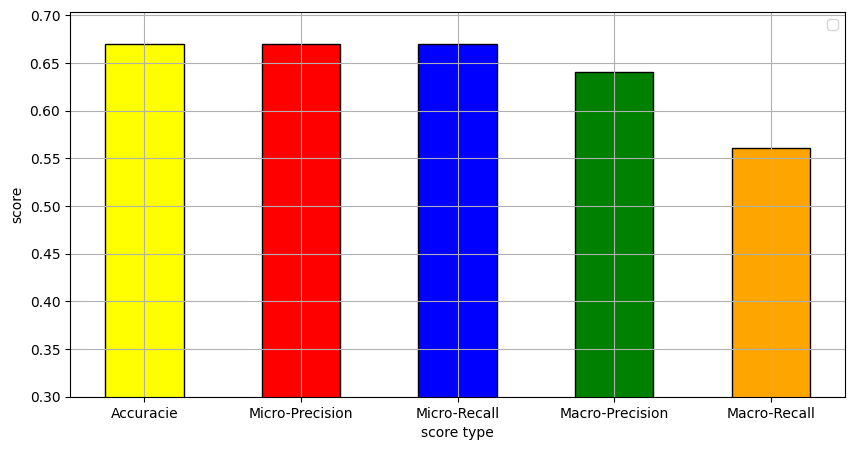

In [587]:
plt.figure(figsize=(10, 5))

colors = ["yellow", "red", "blue", "green", "orange"]
plt.bar(names, scores, edgecolor='black', color=colors, width=0.5)
plt.xlabel("score type")
plt.ylabel("score")
plt.ylim(bottom= 0.3)
plt.legend()
plt.grid()
plt.show()

In [588]:
print("Voting Classifier accuracy: %g" %scores[0], 
      "Voting Classifier micro-precision: %g" %scores[1],
      "Voting Classifier micro-recall: %g" %scores[2],
      "Voting Classifier macro-precision: %g" %scores[3],
      "Voting Classifier micro-recall: %g" %scores[4], sep='\n'
      )

Voting Classifier accuracy: 0.6702
Voting Classifier micro-precision: 0.6702
Voting Classifier micro-recall: 0.6702
Voting Classifier macro-precision: 0.640599
Voting Classifier micro-recall: 0.561291


But after tunning we have the same results

In [589]:
print(vc_grid_searcher.best_estimator_)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=43)),
                             ('rf',
                              RandomForestClassifier(max_features=21,
                                                     n_estimators=167))],
                 weights=(0.2, 0.8))


And that time model chose weight for Random Forest greater: rf/knn like 4/1

What was the best pair of models to blend? Did blending help to increase quality of each classifier?  
**Your answer here**: best pair of models was Random Forest + Decision Tree or kNN as them have same results. But blending didn't help to increase quality higher then Random Forest by itself